<a href="https://colab.research.google.com/github/baygaliyev/eide/blob/main/validation_of_emission_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import

In [1]:
!pip install osmnx numpy matplotlib
# !git clone https://github.com/matteoboh/mobility_airpollution.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [2]:
import os
os.sys.path.append('/content/drive/MyDrive/Colab Notebooks')
# os.sys.path.append('/content/mobility_airpollution/mobair')
# os.sys.path.append('/content/mobility_airpollution')

from datetime import timedelta
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
from shapely.geometry import Point, Polygon

from datetime import datetime
import timeit
# import folium
# import requests
# import urllib.parse

import xgboost as xgb

In [3]:
# mount google drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [4]:
stations_dictionary_rome = {
 'Arenula': {'number': '56', 'lat': 41.89397, 'lon': 12.47538},
 'Bufalotta': {'number': '48', 'lat': 41.94765, 'lon': 12.53366},
 'C.so Francia': {'number': '3', 'lat': 41.94744, 'lon': 12.46956},
#  'Castel di Guido': {'number': '40', 'lat': 41.889451, 'lon': 12.266327},
 'Cinecitta': {'number': '8', 'lat': 41.85771, 'lon': 12.56865},
 'Cipro': {'number': '49', 'lat': 41.90635, 'lon': 12.44758},
 'Fermi': {'number': '47', 'lat': 41.86399, 'lon': 12.46956},
 'L.go Magna Grecia': {'number': '5', 'lat': 41.88307, 'lon': 12.50894},
#  'Tenuta del Cavaliere': {'number': '41', 'lat': 41.92947, 'lon': 12.65847},
 'Villa Ada': {'number': '39', 'lat': 41.93289, 'lon': 12.50694},
 'Malagrotta': {'number': '57', 'lat': 41.87478, 'lon': 12.34558},
 'Preneste': {'number': '2', 'lat': 41.88601, 'lon': 12.54161},
#  'Boncompagni': {'number': '58', 'lat': 41.90956, 'lon': 12.49659},
 'Tiburtina': {'number': '55', 'lat': 41.910268, 'lon': 12.548854}
}

rome_traffic_stations_dictionary = {
 'C.so Francia': {'number': '3', 'lat': 41.94744, 'lon': 12.46956},
 'Fermi': {'number': '47', 'lat': 41.86399, 'lon': 12.46956},
 'L.go Magna Grecia': {'number': '5', 'lat': 41.88307, 'lon': 12.50894},
 'Tiburtina': {'number': '55', 'lat': 41.91026, 'lon': 12.54885}
}

rome_background_stations_dictionary = {
 'Arenula': {'number': '56', 'lat': 41.89397, 'lon': 12.47538},
 'Bufalotta': {'number': '48', 'lat': 41.94765, 'lon': 12.53366},
 'Cinecitta': {'number': '8', 'lat': 41.85771, 'lon': 12.56865},
 'Cipro': {'number': '49', 'lat': 41.90635, 'lon': 12.44758},
 'Villa Ada': {'number': '39', 'lat': 41.93289, 'lon': 12.50694},
 'Malagrotta': {'number': '57', 'lat': 41.87478, 'lon': 12.34558},
 'Preneste': {'number': '2', 'lat': 41.88601, 'lon': 12.54161},
}

rome_good_stations_dictionary = {
#  'Arenula': {'number': '56', 'lat': 41.89397, 'lon': 12.47538},
 'Bufalotta': {'number': '48', 'lat': 41.94765, 'lon': 12.53366},
 'C.so Francia': {'number': '3', 'lat': 41.94744, 'lon': 12.46956},
#  'Castel di Guido': {'number': '40', 'lat': 41.889451, 'lon': 12.266327},
 'Cinecitta': {'number': '8', 'lat': 41.85771, 'lon': 12.56865},
#  'Cipro': {'number': '49', 'lat': 41.90635, 'lon': 12.44758},
 'Fermi': {'number': '47', 'lat': 41.86399, 'lon': 12.46956},
 'L.go Magna Grecia': {'number': '5', 'lat': 41.88307, 'lon': 12.50894},
#  'Tenuta del Cavaliere': {'number': '41', 'lat': 41.92947, 'lon': 12.65847},
 'Villa Ada': {'number': '39', 'lat': 41.93289, 'lon': 12.50694},
 'Malagrotta': {'number': '57', 'lat': 41.87478, 'lon': 12.34558},
 'Preneste': {'number': '2', 'lat': 41.88601, 'lon': 12.54161},
#  'Boncompagni': {'number': '58', 'lat': 41.90956, 'lon': 12.49659},
 'Tiburtina': {'number': '55', 'lat': 41.91026, 'lon': 12.54885}
}

rome_bad_stations_dictionary = {
 'Arenula': {'number': '56', 'lat': 41.89397, 'lon': 12.47538},
 'Cipro': {'number': '49', 'lat': 41.90635, 'lon': 12.44758},
 'L.go Magna Grecia': {'number': '5', 'lat': 41.88307, 'lon': 12.50894},
 'Preneste': {'number': '2', 'lat': 41.88601, 'lon': 12.54161},
}

In [5]:
def get_road_segments(lat, lon, dist=200, simplify=False, retain_all=True, truncate_by_edge=False, network_type='drive_service'):
    """
    Generate road segments within a specified distance from a geographic point.

    Parameters:
    - lat (float): Latitude of the location.
    - lon (float): Longitude of the location.
    - dist (int): Distance around the point to generate the graph (in meters).
    - network_type (str): Type of network ('drive', 'bike', 'all', etc.).
    - retain_all (bool): Whether to retain all the components of the graph.
    - truncate_by_edge (bool): Whether to truncate the graph by the edge.
    - simplify (bool): Whether to simplify the graph topology.

    Returns:
    - road_segments (DataFrame): DataFrame containing road segments with start point, end point, and length.
    """

    # Generate the graph from the given point
    G = ox.graph_from_point((lat, lon), dist=dist, network_type=network_type, simplify=simplify,
                            retain_all=retain_all, truncate_by_edge=truncate_by_edge)

    # Convert the graph to GeoDataFrames (only edges)
    road_segments = ox.graph_to_gdfs(G, nodes=False, edges=True).reset_index()

    # Rename the columns to 'start_point' and 'end_point'
    road_segments = road_segments.rename(columns={'u': 'start_point', 'v': 'end_point'})

    # Keep only 'start_point', 'end_point', and 'length' columns
    # road_segments = road_segments[['start_point', 'end_point', 'length']]

    # Print the number of road segments
    print(f"No. of roads around the station in {area}: {road_segments.shape[0]}")

    return road_segments

In [6]:
import pandas as pd
from scipy import stats

def calculate_spatial_correlations(sensor_df, stations_dict, time_period='month'):
    """
    This function calculates Pearson correlation coefficients between CO2 estimations
    and NOx sensor data for multiple areas, allowing for grouping by week, month, or quarter.

    Parameters:
    sensor_df (pd.DataFrame): DataFrame containing NOx sensor data for multiple areas.
    stations_dict (dict): Dictionary containing model estimations (ts_weekly) for different areas.
    time_period (str): The time period for grouping ('week', 'month', 'quarter'). Default is 'month'.

    Returns:
    pd.DataFrame: A DataFrame containing the correlations and p-values for each time period.
    """

    # Ensure the time period is valid
    if time_period not in ['week', 'month', 'quarter']:
        raise ValueError("Invalid time period. Choose from 'week', 'month', or 'quarter'.")

    # Ensure the time period column is numeric in sensor_df
    if not pd.api.types.is_numeric_dtype(sensor_df[time_period]):
        sensor_df[time_period] = sensor_df[time_period].astype(int)

    # Extract the area numbers from the Rome dictionary that exist in both sensor_df and stations_dict
    valid_areas = [info['number'] for info in stations_dict.values() if info['number'] in sensor_df.columns]
    print("Valid areas:", valid_areas)

    # Prepare an empty list to store all model data
    model_data_list = []

    # Loop over each area in the stations dictionary to collect model data (ts_weekly)
    for station_name, info in stations_dict.items():
        area_number = info['number']
        ts_weekly = info.get('ts_weekly')

        if ts_weekly is not None:
            # Add the area column to the ts_weekly DataFrame for merging
            ts_weekly['area'] = area_number
            model_data_list.append(ts_weekly)

    # Combine all model data into a single DataFrame
    model_df = pd.concat(model_data_list, ignore_index=True)

    # Aggregate model data by the time period and area using the mean
    model_df = model_df.groupby(['area', time_period]).sum('CO_2').reset_index()

    # Aggregate the sensor data by the time period using the mean
    sensor_df_agg = sensor_df.groupby(time_period).mean().reset_index()

    # Reshape the sensor data to long format using only the valid areas
    sensor_long = pd.melt(sensor_df_agg, id_vars=[time_period], value_vars=valid_areas,
                          var_name='area', value_name='NOx_sensor')

    # Merge sensor and model data by time period and area
    merged_df = pd.merge(sensor_long, model_df, on=[time_period, 'area'], suffixes=('_sensor', '_model'))

    # Create a DataFrame to store correlation results
    results = []

    # Loop through each time period (week, month, or quarter) and calculate correlation
    for period in merged_df[time_period].unique():
        period_data = merged_df[merged_df[time_period] == period]

        # Check for sufficient data to compute correlation (need at least 2 points)
        if len(period_data) > 1:
            # Drop rows with NaN values in either 'NOx_sensor' or 'CO_2'
            period_data_clean = period_data[['NOx_sensor', 'CO_2']].dropna()

            # Ensure there are still at least 2 data points after dropping NaNs
            if len(period_data_clean) > 1:
                y_values = period_data_clean['NOx_sensor']  # Sensor measurements (y-axis)
                x_values = period_data_clean['CO_2']        # Model estimations (x-axis)

                # print(period_data_clean)
                # print()
                # Calculate Pearson correlation
                correlation, p_value = stats.pearsonr(x_values, y_values)
            else:
                correlation, p_value = None, None  # Insufficient data after removing NaNs
        else:
            correlation, p_value = None, None  # Insufficient data for correlation

        # Store the results
        results.append({
            time_period: period,
            'correlation': correlation,
            'p_value': p_value
        })

    # Convert the results into a DataFrame
    results_df = pd.DataFrame(results)

    # Return the correlation results
    return results_df


In [7]:
import matplotlib.pyplot as plt

def plot_pollutant_correlation(df, sensor_df, time_period='quarter', area_name='Borghetto', co2_col='CO_2', no2_col='no2'):
    """
    This function groups CO2 data by a specified time period (week, month, or quarter),
    calculates the mean, computes the Pearson correlation coefficient between NO2 and CO2 data,
    and plots both time series. The title of the plot dynamically includes the area name.

    Parameters:
    df (pd.DataFrame): DataFrame containing time period and CO2 data.
    sensor_df (pd.DataFrame): DataFrame containing time period and NO2 sensor data.
    time_period (str): Time period for grouping ('week', 'month', 'quarter'). Default is 'quarter'.
    area_name (str): Name of the area for which the data is being plotted. Default is 'Borghetto'.
    co2_col (str): The name of the CO2 column in df. Default is 'CO_2'.
    no2_col (str): The name of the NO2 column in sensor_df. Default is 'no2'.

    Returns:
    None: Displays the plot and prints the correlation coefficient.
    """

    # Group CO2 data by the specified time period and calculate the mean
    grouped_co2 = df.groupby([time_period])[co2_col].mean().reset_index()

    # Calculate Pearson correlation coefficient between NO2 and CO2 data
    correlation = sensor_df[no2_col].corr(grouped_co2[co2_col])

    # Display the correlation result
    print(f'Correlation coefficient between Model and Sensor ({time_period}ly, {area_name}): {correlation:.2f}')

    # Create figure and axis for the plot
    fig, ax1 = plt.subplots()

    # Plot the CO2 model data on the first axis
    ax1.plot(grouped_co2[time_period], grouped_co2[co2_col], 'b-', label='Model Estimation')
    ax1.set_xlabel(time_period.capitalize())  # Dynamically set x-label based on the time period
    ax1.set_ylabel(f'CO2 Amount ({time_period.capitalize()})', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis for the NO2 sensor data
    ax2 = ax1.twinx()
    ax2.plot(sensor_df[time_period], sensor_df[no2_col], 'r-', label='Sensor Data')
    ax2.set_ylabel(f'NOx Amount ({time_period.capitalize()})', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add legends to both plots
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Add title to the plot
    plt.title(f'{area_name}: {time_period.capitalize()}ly CO2 Estimations vs NO2 Sensor Data')

    # Show the plot
    plt.show()
    print()

    return correlation

---
Preprocessing Sensor Data

In [8]:
import pandas as pd

# Load your data
input_path = '/content/drive/MyDrive/Colab Notebooks/phd_data/validation/'
sensors_rome = pd.read_csv(input_path + 'rome_nox_sensor_data_2017.csv')

# Convert Julian day to datetime and set the year to 2017
sensors_rome['date'] = pd.to_datetime(sensors_rome['jd'], format='%j')
sensors_rome['date'] = sensors_rome['date'].apply(lambda x: x.replace(year=2017))

# Count occurrences of the value 2 across the entire DataFrame
count_in_df = (sensors_rome.eq(-999)).sum().sum()
print("Count of 2 in the entire DataFrame:", count_in_df)


# Replace -999 values with the mean of each column
for column in sensors_rome.columns:
    mean_value = sensors_rome[column][sensors_rome[column] != -999].mean()  # Calculate mean excluding -999
    sensors_rome[column] = sensors_rome[column].replace(-999, mean_value)  # Replace -999 with the mean

# Display the updated DataFrame
sensors_rome.head()

Count of 2 in the entire DataFrame: 256


,anno,jd,2,3,5,8,10,11,14,15,...,55,56,57,60,83,84,85,86,87,date
0,2017,1,198.0,160.0,245.0,237.0,87.0,150.0,7.0,89.0,...,284.0,137.0,86.0,64.0,84.0,33.0,139.0,164.0,46.030581,2017-01-01
1,2017,2,191.0,325.0,211.0,198.0,180.0,189.0,14.0,35.0,...,233.0,159.0,62.0,31.0,34.0,29.0,70.0,98.0,46.030581,2017-01-02
2,2017,3,86.0,216.0,112.0,54.0,82.0,57.0,10.0,13.0,...,163.0,94.0,14.0,12.0,20.0,27.0,46.0,27.0,46.030581,2017-01-03
3,2017,4,149.0,233.0,184.0,158.0,89.0,94.0,7.0,40.0,...,235.0,174.0,66.0,46.0,74.0,41.0,100.0,64.0,46.030581,2017-01-04
4,2017,5,52.0,103.0,78.0,49.0,55.0,69.0,5.0,15.0,...,72.0,59.0,19.0,17.0,24.0,23.0,41.0,57.0,46.030581,2017-01-05


In [9]:
# Aggregating NO2 data to weekly averages
sensors_rome['week'] = pd.to_datetime(sensors_rome['date']).dt.isocalendar().week
# Aggregating NO2 data to monthly averages
sensors_rome['month'] = pd.to_datetime(sensors_rome['date']).dt.month
# Aggregating NO2 data to quarterly averages
sensors_rome['quarter'] = pd.to_datetime(sensors_rome['date']).dt.quarter

# Create the 'week_start' column showing the Monday of the respective ISO week
sensors_rome['week_start'] = sensors_rome['date'] - pd.to_timedelta(sensors_rome['date'].dt.weekday, unit='D')

# Filter out rows where:
# 1. The 'week' is 52 and the date is in January 2017 (this belongs to 2016's last week).
# 2. The 'week' is 1 and the date is in December 2017 (this belongs to 2018's first week).
# Adjust week values for those cases instead of filtering them out
sensors_rome['adjusted_week'] = sensors_rome['week']

sensors_rome.loc[
    (sensors_rome['week'] == 52) & (sensors_rome['anno'] == 2017) & (sensors_rome['date'].dt.month == 1),
    'adjusted_week'
] = None  # Or set to another value like 0 to exclude from weekly aggregation

sensors_rome.loc[
    (sensors_rome['week'] == 1) & (sensors_rome['anno'] == 2017) & (sensors_rome['date'].dt.month == 12),
    'adjusted_week'
] = None  # Or set to another value like 0

sensors_rome

,anno,jd,2,3,5,8,10,11,14,15,...,84,85,86,87,date,week,month,quarter,week_start,adjusted_week
0,2017,1,198.0,160.0,245.0,237.0,87.0,150.0,7.0,89.0,...,33.0,139.0,164.0,46.030581,2017-01-01,52,1,1,2016-12-26,<NA>
1,2017,2,191.0,325.0,211.0,198.0,180.0,189.0,14.0,35.0,...,29.0,70.0,98.0,46.030581,2017-01-02,1,1,1,2017-01-02,1
2,2017,3,86.0,216.0,112.0,54.0,82.0,57.0,10.0,13.0,...,27.0,46.0,27.0,46.030581,2017-01-03,1,1,1,2017-01-02,1
3,2017,4,149.0,233.0,184.0,158.0,89.0,94.0,7.0,40.0,...,41.0,100.0,64.0,46.030581,2017-01-04,1,1,1,2017-01-02,1
4,2017,5,52.0,103.0,78.0,49.0,55.0,69.0,5.0,15.0,...,23.0,41.0,57.0,46.030581,2017-01-05,1,1,1,2017-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017,361,25.0,91.0,58.0,20.0,30.0,15.0,7.0,7.0,...,24.0,18.0,4.0,18.000000,2017-12-27,52,12,4,2017-12-25,52
361,2017,362,67.0,152.0,105.0,58.0,66.0,34.0,6.0,25.0,...,40.0,70.0,3.0,33.000000,2017-12-28,52,12,4,2017-12-25,52
362,2017,363,119.0,172.0,109.0,90.0,55.0,67.0,6.0,33.0,...,32.0,120.0,31.0,65.000000,2017-12-29,52,12,4,2017-12-25,52
363,2017,364,165.0,154.0,204.0,157.0,124.0,95.0,13.0,24.0,...,22.0,70.0,107.0,107.000000,2017-12-30,52,12,4,2017-12-25,52


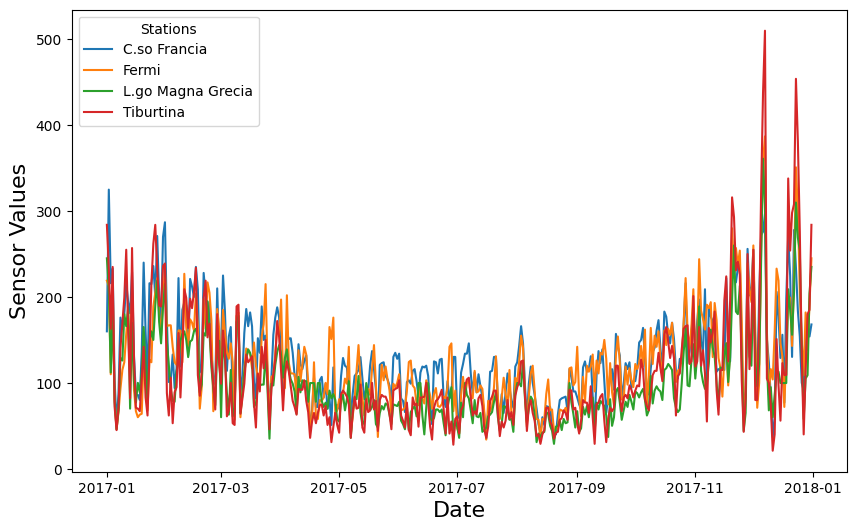

In [10]:
import matplotlib
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over the stations and plot
for city in rome_traffic_stations_dictionary:
    col_num = stations_dictionary_rome[city]['number']
    plt.plot(sensors_rome.date, sensors_rome[col_num], label=city)  # Add label for the legend

# Add title
# plt.title("Sensor Data for AQM Stations in Rome", size=24)

# Add legend
plt.legend(title="Stations")  # The title inside the legend

# Optionally, add labels to the axes
plt.xlabel("Date", size=16)
plt.ylabel("Sensor Values", size=16)

# Show the plot
plt.show()


# Validation before Missing Data Imputation

In [11]:
path = '/content/drive/MyDrive/Colab Notebooks/phd_data/input_data/'

df = pd.read_csv(path + 'rome_weekly_emissions_simple_undirected_network.csv')
df = df[df['CO_2']>0]

# Define the start of the year 2017 (Monday is typically the start of the week in ISO calendars)
start_of_year = pd.to_datetime('2017-01-01')

# Calculate the start date of each week
df['week_start'] = df['week'].apply(lambda x: start_of_year + timedelta(weeks=int(x) - 1))

# Function to determine month based on majority of days in the week
def get_majority_month(week_start):
  week_days = [week_start + timedelta(days=i) for i in range(7)]  # Generate the 7 days of the week
  month_counts = pd.Series([day.month for day in week_days]).value_counts()  # Count days in each month
  return month_counts.idxmax()  # Return the month with the most days

# Map the week to the a month
df['month'] = df['week_start'].apply(get_majority_month)

# estimations_df = df.groupby(['start_point', 'end_point', 'month'])['CO_2'].mean().reset_index()
print(len(df))
df.head()

1250009


,start_point,end_point,week,length,CO_2,NO_x,PM,VOC,week_start,month
0,21637960,347298638,1.0,41.366,2.666664,0.000587,0.000000,0.004473,2017-01-01,1
1,21637960,347298638,2.0,41.366,3.279245,0.000619,0.000000,0.008939,2017-01-08,1
2,21637960,347298638,6.0,41.366,4.167718,0.002433,0.000040,0.013418,2017-02-05,2
3,21637960,347298638,8.0,41.366,5.300154,0.001049,0.000000,0.008945,2017-02-19,2
4,21637960,347298638,9.0,41.366,6.573168,0.002332,0.000019,0.013422,2017-02-26,3


In [12]:
estimations_df = df.groupby(['start_point', 'end_point', 'month'])['CO_2'].sum().reset_index()
print(len(estimations_df))
estimations_df.head()

534720


,start_point,end_point,month,CO_2
0,21637960,347298638,1,5.945909
1,21637960,347298638,2,9.467872
2,21637960,347298638,3,20.851852
3,21637960,347298638,4,9.420857
4,21637960,347298638,5,5.262315


In [13]:
# Calculate emissions around stations

# OK: Arenula, Bufalotta, Cipro, C.so Francia, Cinecitta, Fermi, L.go Magna Grecia, Villa Ada, Malagrotta, Preneste, Boncompagni, Tiburtina
# PROBLEM: Castel di Guido, Tenuta del Cavaliere (can't simplify)

# area = 'Tiburtina'

for area in stations_dictionary_rome:

    lat = stations_dictionary_rome[area]['lat']
    lon = stations_dictionary_rome[area]['lon']

    roads_around_point = get_road_segments(lat, lon, dist=200, network_type='drive_service',
                                  retain_all=True, truncate_by_edge=False, simplify=True)

    # Merge the two dataframes based on start_point and end_point
    monthly_estimations = roads_around_point.merge(estimations_df, on=['start_point','end_point'], how='inner')

    # Print the length of the merge dataframe
    print(f"No.: {monthly_estimations.shape[0]}")

    # Group by standardized start and end points and month, then sum CO_2/m
    df_grouped = monthly_estimations.groupby(['month']).agg({
    'CO_2': 'sum',
    }).reset_index()

    # Sort the DataFrame based on the 'date' column
    ts_monthly = df_grouped.sort_values(by='month')

    stations_dictionary_rome[area]['ts_weekly'] = ts_monthly
    print(f"Total amount of CO_2: {sum(ts_monthly['CO_2'])}")


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Arenula: 105
No.: 229
Total amount of CO_2: 2483.8697183590443


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Bufalotta: 81
No.: 146
Total amount of CO_2: 355.1141980831246


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in C.so Francia: 68
No.: 263
Total amount of CO_2: 2822.8244391238795


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Cinecitta: 39
No.: 114
Total amount of CO_2: 992.1564312641368


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Cipro: 61
No.: 282
Total amount of CO_2: 2389.2389703813865


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Fermi: 93
No.: 445
Total amount of CO_2: 4620.556145380286


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in L.go Magna Grecia: 54
No.: 270
Total amount of CO_2: 29397.207577146637


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Villa Ada: 10
No.: 35
Total amount of CO_2: 257.2802495424074


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Malagrotta: 42
No.: 96
Total amount of CO_2: 429.3848647805605


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Preneste: 112
No.: 320
Total amount of CO_2: 1818.1721339984206


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Tiburtina: 54
No.: 201
Total amount of CO_2: 1810.6087432610025


In [ ]:
# OK: Arenula, Bufalotta, Cipro, C.so Francia, Cinecitta, Fermi, L.go Magna Grecia, Villa Ada, Malagrotta, Preneste, Boncompagni, Tiburtina
# PROBLEM: Castel di Guido, Tenuta del Cavaliere (can't simplify)

# area = 'Tiburtina'

for area in stations_dictionary_rome:
    lat = stations_dictionary_rome[area]['lat']
    lon = stations_dictionary_rome[area]['lon']
    roads_around_point = get_road_segments(lat, lon, dist=200, network_type='drive_service',
                                  retain_all=True, truncate_by_edge=False, simplify=True)

    # Merge the two dataframes based on start_point and end_point
    weekly_estimations = roads_around_point.merge(df, on=['start_point','end_point'], how='inner')
    # Print the length of the merge dataframe
    print(f"No.: {weekly_estimations.shape[0]}")

    # Group by standardized start and end points and week, then sum CO_2 and NO_x
    df_grouped = weekly_estimations.groupby(['week', 'week_start']).agg({
    'CO_2': 'sum',
    'NO_x': 'sum'
    }).reset_index()

    # Sort the DataFrame based on the 'date' column
    ts_weekly = df_grouped.sort_values(by='week')

    # Function to determine month based on majority of days in the week
    def get_majority_month(week_start):
      week_days = [week_start + timedelta(days=i) for i in range(7)]  # Generate the 7 days of the week
      month_counts = pd.Series([day.month for day in week_days]).value_counts()  # Count days in each month
      return month_counts.idxmax()  # Return the month with the most days

    # Map the week to the a month
    ts_weekly['month'] = ts_weekly['week_start'].apply(get_majority_month)

    # Define the quarter based on the month
    ts_weekly['quarter'] = ts_weekly['month'].apply(lambda x: (x - 1) // 3 + 1)

    stations_dictionary_rome[area]['ts_weekly'] = ts_weekly
    print(f"Total amount of CO_2: {sum(ts_weekly['CO_2'])}")


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Arenula: 105
No.: 379
Total amount of CO_2: 2483.869718359046


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Bufalotta: 81
No.: 239
Total amount of CO_2: 355.11419808312473


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in C.so Francia: 68
No.: 624
Total amount of CO_2: 2822.824439123879


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Cinecitta: 39
No.: 249
Total amount of CO_2: 992.1564312641369


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Cipro: 61
No.: 673
Total amount of CO_2: 2389.238970381387


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Fermi: 93
No.: 1036
Total amount of CO_2: 4620.556145380284


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in L.go Magna Grecia: 54
No.: 631
Total amount of CO_2: 29397.207577146644


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Villa Ada: 10
No.: 69
Total amount of CO_2: 257.28024954240743


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Malagrotta: 42
No.: 195
Total amount of CO_2: 465.885943371238


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Preneste: 112
No.: 545
Total amount of CO_2: 1818.1721339984203


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


No. of roads around the station in Tiburtina: 54
No.: 479
Total amount of CO_2: 1810.6087432610027


In [14]:
# Copy ts_weekly to the smaller dictionaries
for area_name, info in stations_dictionary_rome.items():
    if area_name in rome_traffic_stations_dictionary:
        rome_traffic_stations_dictionary[area_name]['ts_weekly'] = info['ts_weekly']
    if area_name in rome_background_stations_dictionary:
        rome_background_stations_dictionary[area_name]['ts_weekly'] = info['ts_weekly']
    if area_name in rome_good_stations_dictionary:
        rome_good_stations_dictionary[area_name]['ts_weekly'] = info['ts_weekly']
    if area_name in rome_bad_stations_dictionary:
        rome_bad_stations_dictionary[area_name]['ts_weekly'] = info['ts_weekly']

# Check the results
# print("Rome Traffic Stations:", rome_traffic_stations_dictionary)

**Calculate SPATIAL correlations between model estimations and sensor measurements**

Quarter

In [ ]:
results_by_quarter = calculate_spatial_correlations(sensors_rome, stations_dictionary_rome, time_period='quarter')
print(results_by_quarter)

Month

In [15]:
results_by_month = calculate_spatial_correlations(sensors_rome, stations_dictionary_rome, time_period='month')
print(results_by_month)

Valid areas: ['56', '48', '3', '8', '49', '47', '5', '39', '57', '2', '55']
    month  correlation   p_value
0       1     0.416937  0.202053
1       2     0.540901  0.085769
2       3     0.293740  0.380636
3       4     0.518925  0.101913
4       5     0.277906  0.407991
5       6     0.202739  0.549929
6       7     0.225364  0.505233
7       8     0.339396  0.307206
8       9     0.150742  0.658187
9      10     0.796698  0.003331
10     11     0.787486  0.004009
11     12     0.888601  0.000256


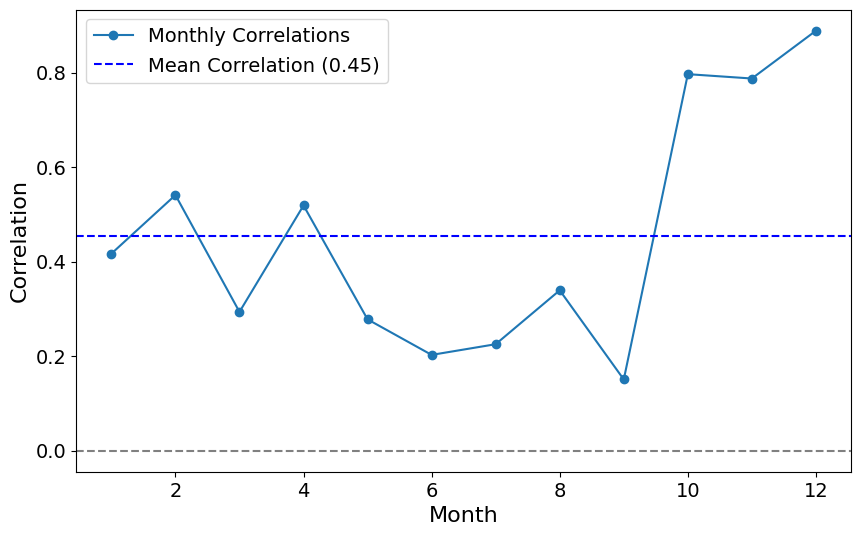

In [20]:
import matplotlib.pyplot as plt

mean_correlation = results_by_month['correlation'].mean()

# plot for monthly correlations
plt.figure(figsize=(10, 6))

plt.plot(results_by_month['month'], results_by_month['correlation'], marker='o', label='Monthly Correlations')
plt.axhline(y=0, color='gray', linestyle='--')  # Zero correlation line
plt.axhline(y=mean_correlation, color='blue', linestyle='--', label=f'Mean Correlation ({mean_correlation:.2f})')  # Mean line

# plt.title('Monthly Correlation between CO2 Estimations and NOx Measurements')
plt.xlabel('Month', size=16)
plt.ylabel('Correlation', size=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

save = True

validation_path = '/content/drive/MyDrive/phd/research/2-validation/'
strfile = "monthly_spatial_correlations_rome.pdf"

if os.path.isfile(strfile):
 os.remove(strfile)

if save:
  plt.savefig(os.path.join(validation_path+strfile), format='pdf', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

plt.show()


Week

In [ ]:
results_by_week = calculate_spatial_correlations(sensors_rome, stations_dictionary_rome, time_period='week')
print(results_by_week)

Valid areas: ['56', '48', '3', '8', '49', '47', '5', '39', '57', '2', '55']
    week  correlation   p_value
0      1     0.408681  0.212048
1      2     0.269041  0.423714
2      3     0.552228  0.078153
3      4     0.505083  0.113034
4      5     0.472782  0.141946
5      6     0.511210  0.108020
6      7     0.091759  0.788451
7      8     0.493675  0.122766
8      9     0.734382  0.010062
9     10     0.339733  0.306695
10    11     0.436263  0.179776
11    12     0.233660  0.489251
12    13     0.241951  0.473507
13    14     0.394695  0.229638
14    15     0.421152  0.197060
15    16     0.501376  0.116140
16    17     0.703093  0.015799
17    18     0.257470  0.444666
18    19     0.595036  0.053467
19    20     0.289336  0.388150
20    21     0.173942  0.609002
21    22     0.138262  0.703267
22    23     0.195005  0.565563
23    24     0.257219  0.445126
24    25     0.091038  0.815814
25    26     0.250335  0.457822
26    27     0.156764  0.665383
27    28     0.208891  0.537

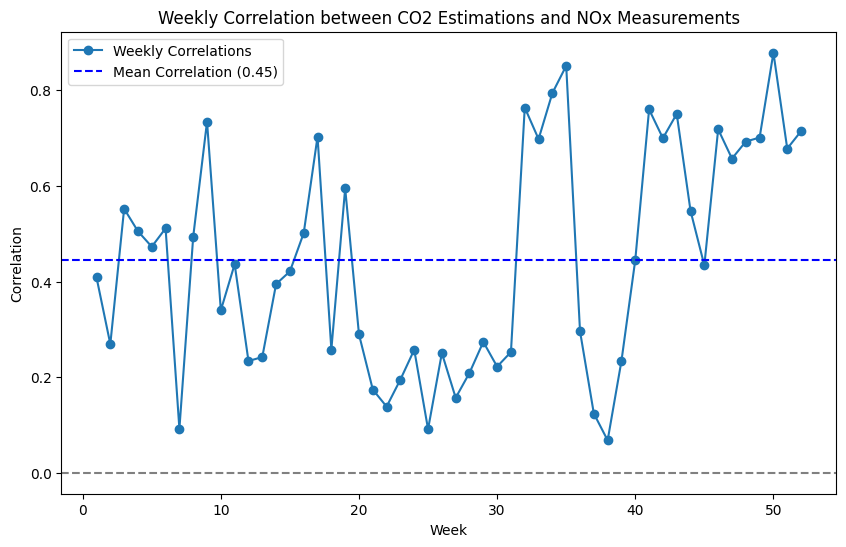

In [ ]:
import matplotlib.pyplot as plt

# the mean of the correlations
mean_correlation = results_by_week['correlation'].mean()

# the plot for weekly correlations
plt.figure(figsize=(10, 6))

plt.plot(results_by_week['week'], results_by_week['correlation'], marker='o', label='Weekly Correlations')

plt.axhline(y=0, color='gray', linestyle='--')  # Zero correlation line
plt.axhline(y=mean_correlation, color='blue', linestyle='--', label=f'Mean Correlation ({mean_correlation:.2f})')  # Mean line

plt.title('Weekly Correlation between CO2 Estimations and NOx Measurements')
plt.xlabel('Week')
plt.ylabel('Correlation')
plt.legend()
plt.show()


**Calculate TEMPORAL correlations between model estimations and sensor measurements**

In [ ]:
import matplotlib.pyplot as plt

def plot_temporal_correlation(df, sensor_df, time_period='quarter', area_name='Borghetto', co2_col='CO_2', no2_col='no2'):
    """
    This function groups CO2 data by a specified time period (week, month, or quarter),
    calculates the mean, computes the Pearson correlation coefficient between NO2 and CO2 data,
    and plots both time series. The title of the plot dynamically includes the area name.

    Parameters:
    df (pd.DataFrame): DataFrame containing time period and CO2 data.
    sensor_df (pd.DataFrame): DataFrame containing time period and NO2 sensor data.
    time_period (str): Time period for grouping ('week', 'month', 'quarter'). Default is 'quarter'.
    area_name (str): Name of the area for which the data is being plotted. Default is 'Borghetto'.
    co2_col (str): The name of the CO2 column in df. Default is 'CO_2'.
    no2_col (str): The name of the NO2 column in sensor_df. Default is 'no2'.

    Returns:
    None: Displays the plot and prints the correlation coefficient.
    """

    # Group CO2 data by the specified time period and calculate the mean
    grouped_co2 = df.groupby([time_period])[co2_col].mean().reset_index()

    # Calculate Pearson correlation coefficient between NO2 and CO2 data
    correlation = sensor_df[no2_col].corr(grouped_co2[co2_col])

    # Display the correlation result
    print(f'Correlation coefficient between Model and Sensor ({time_period}ly, {area_name}): {correlation:.2f}')

    # Create figure and axis for the plot
    fig, ax1 = plt.subplots()

    # Plot the CO2 model data on the first axis
    ax1.plot(grouped_co2[time_period], grouped_co2[co2_col], 'b-', label='Model Estimation')
    ax1.set_xlabel(time_period.capitalize())  # Dynamically set x-label based on the time period
    ax1.set_ylabel(f'CO2 Amount ({time_period.capitalize()})', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis for the NO2 sensor data
    ax2 = ax1.twinx()
    ax2.plot(sensor_df[time_period], sensor_df[no2_col], 'r-', label='Sensor Data')
    ax2.set_ylabel(f'NOx Amount ({time_period.capitalize()})', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add legends to both plots
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Add title to the plot
    plt.title(f'{area_name}: {time_period.capitalize()}ly CO2 Estimations vs NO2 Sensor Data')

    # Show the plot
    plt.show()
    print()

    return correlation

Week

Correlation coefficient between Model and Sensor (weekly, Arenula): -0.16


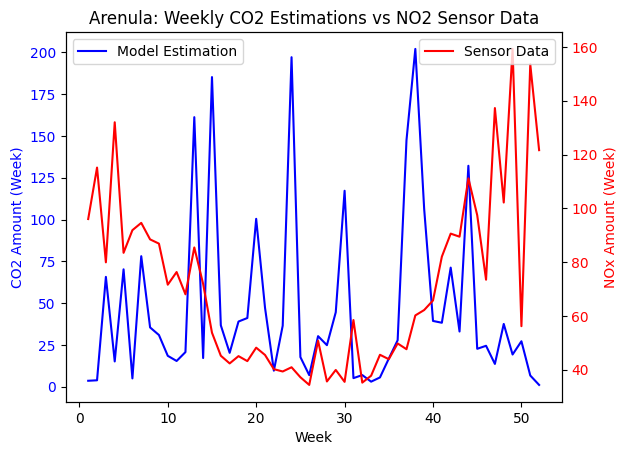


Correlation coefficient between Model and Sensor (weekly, Bufalotta): 0.02


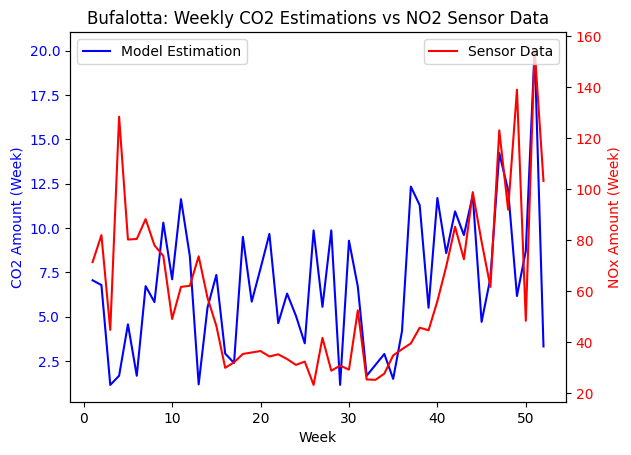


Correlation coefficient between Model and Sensor (weekly, C.so Francia): 0.12


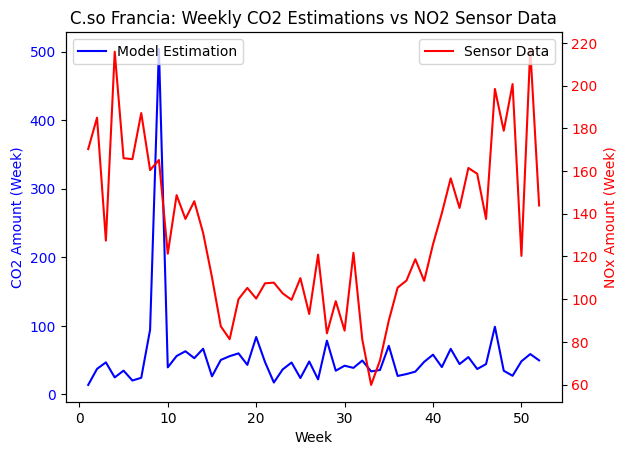


Correlation coefficient between Model and Sensor (weekly, Cinecitta): 0.04


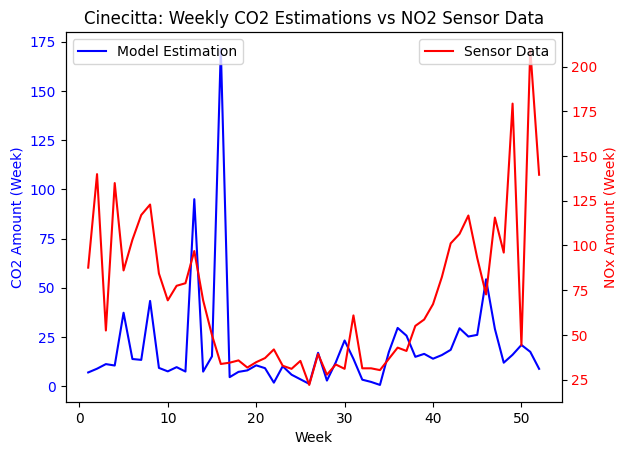


Correlation coefficient between Model and Sensor (weekly, Cipro): -0.14


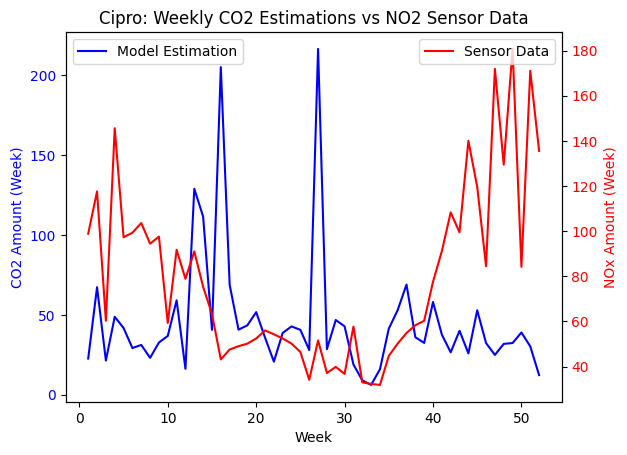


Correlation coefficient between Model and Sensor (weekly, Fermi): 0.10


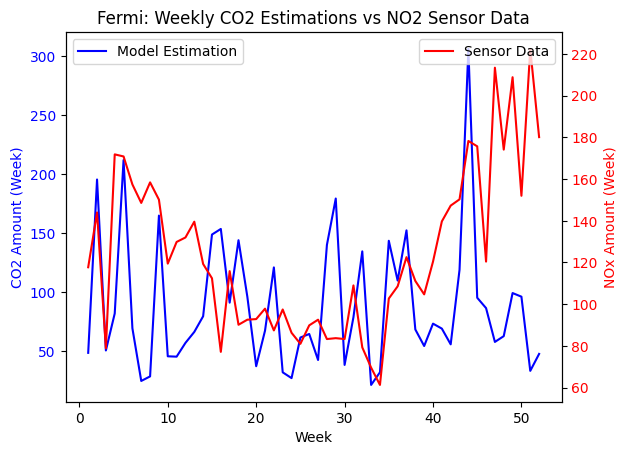


Correlation coefficient between Model and Sensor (weekly, L.go Magna Grecia): -0.34


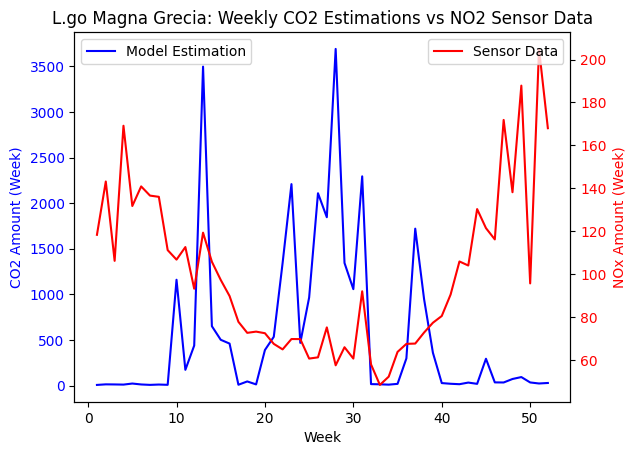


Correlation coefficient between Model and Sensor (weekly, Villa Ada): 0.02


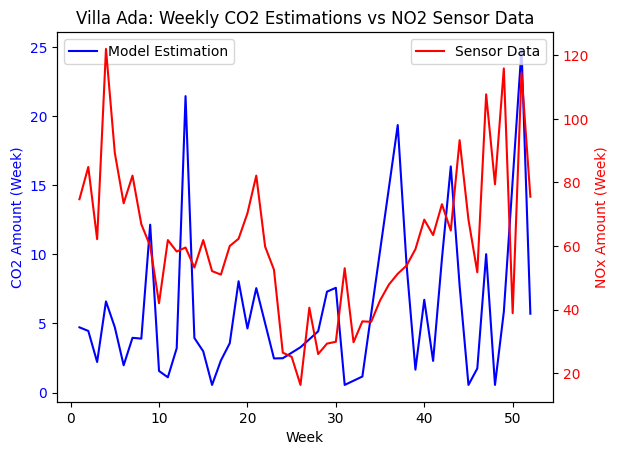


Correlation coefficient between Model and Sensor (weekly, Malagrotta): 0.30


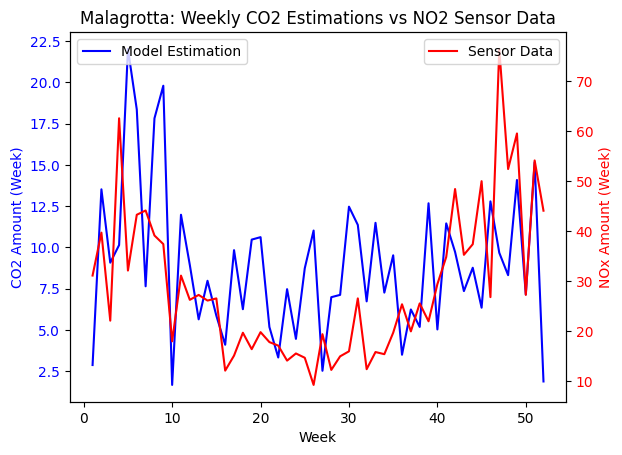


Correlation coefficient between Model and Sensor (weekly, Preneste): -0.09


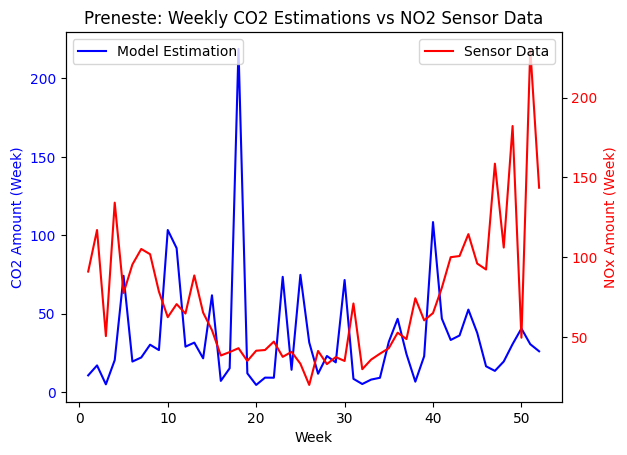


Correlation coefficient between Model and Sensor (weekly, Tiburtina): 0.41


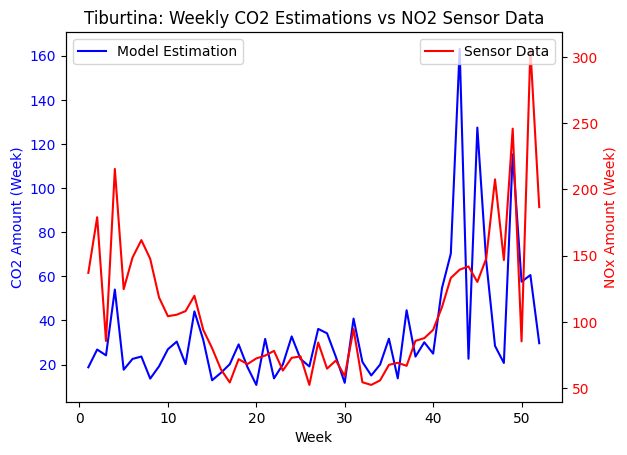


Mean Correlation across all areas: 0.026


In [ ]:
correlation_results_weekly = []

for area in stations_dictionary_rome:
  col_num = stations_dictionary_rome[area]['number']

  ts_co2_weekly_estimation = stations_dictionary_rome[area]['ts_weekly']

  # Group sensor emissions by week and take the mean
  ts_nox_weekly_sensor = sensors_rome.groupby(['week'])[col_num].mean().reset_index()

  correlation = plot_temporal_correlation(ts_co2_weekly_estimation, ts_nox_weekly_sensor, no2_col=col_num, time_period='week', area_name=area)

  # Append the correlation result to the list
  correlation_results_weekly.append(correlation)

# Calculate the mean correlation
mean_correlation_weekly = sum(correlation_results_weekly) / len(correlation_results_weekly)

# Display the mean correlation result
print(f'Mean Correlation across all areas: {mean_correlation_weekly:.3f}')

Month

Correlation coefficient between Model and Sensor (monthly, Arenula): -0.44


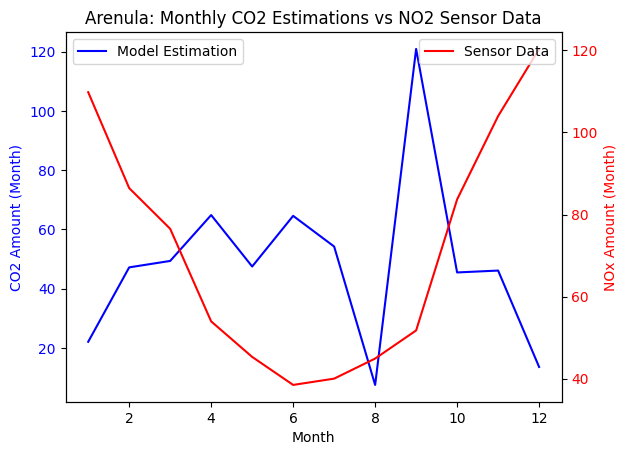


Correlation coefficient between Model and Sensor (monthly, Bufalotta): 0.39


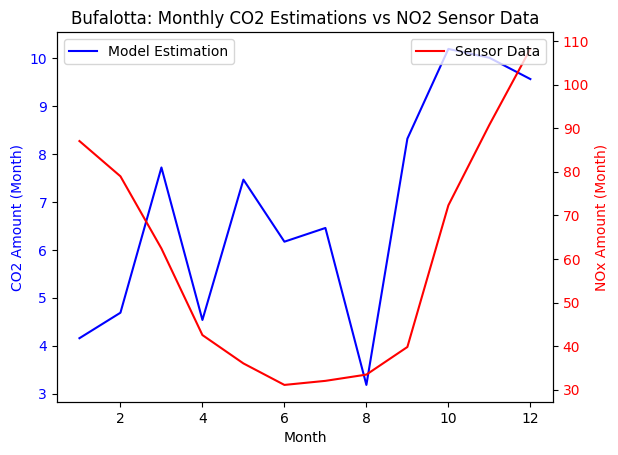


Correlation coefficient between Model and Sensor (monthly, C.so Francia): 0.11


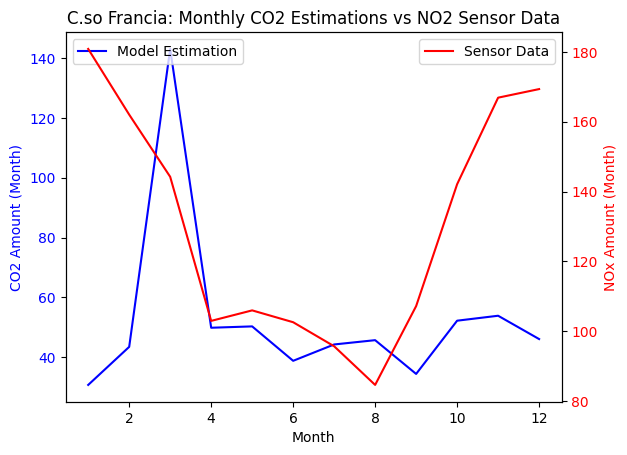


Correlation coefficient between Model and Sensor (monthly, Cinecitta): 0.14


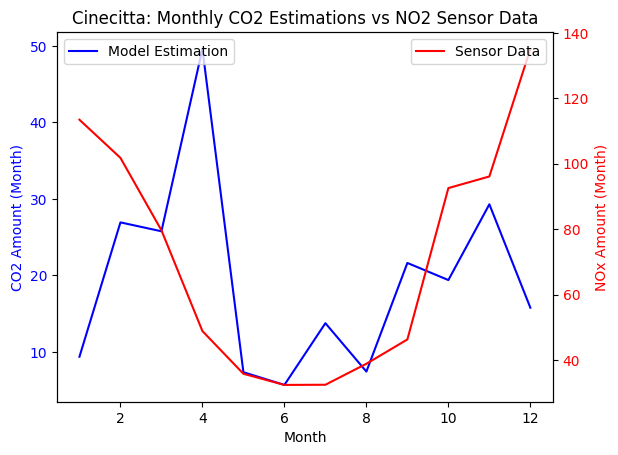


Correlation coefficient between Model and Sensor (monthly, Cipro): -0.35


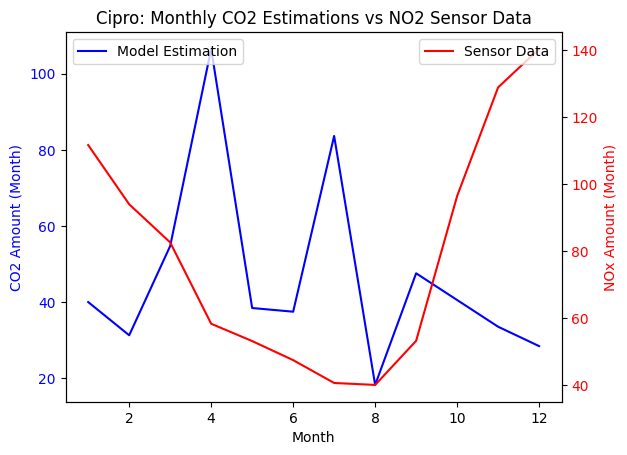


Correlation coefficient between Model and Sensor (monthly, Fermi): 0.07


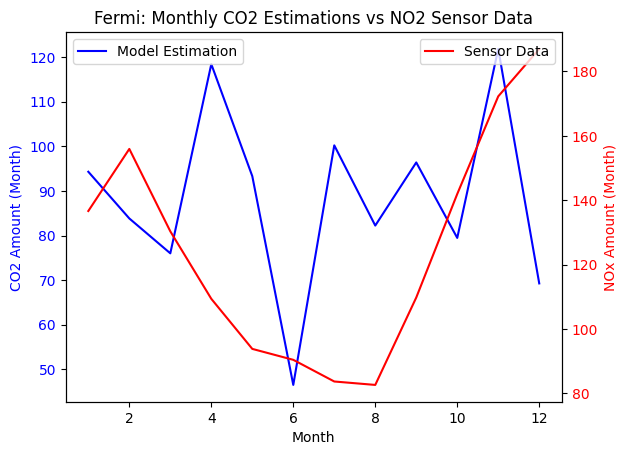


Correlation coefficient between Model and Sensor (monthly, L.go Magna Grecia): -0.68


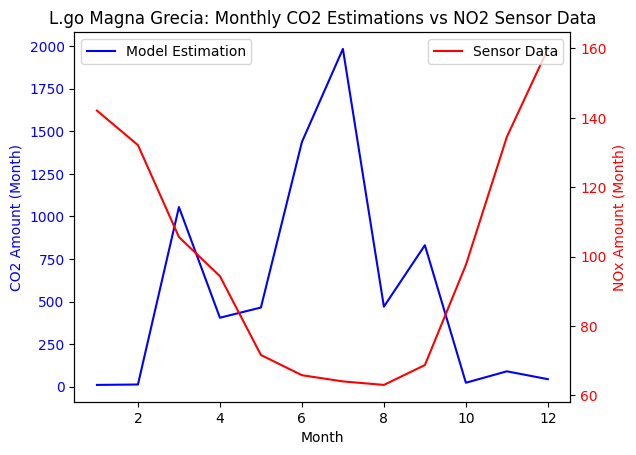


Correlation coefficient between Model and Sensor (monthly, Villa Ada): 0.28


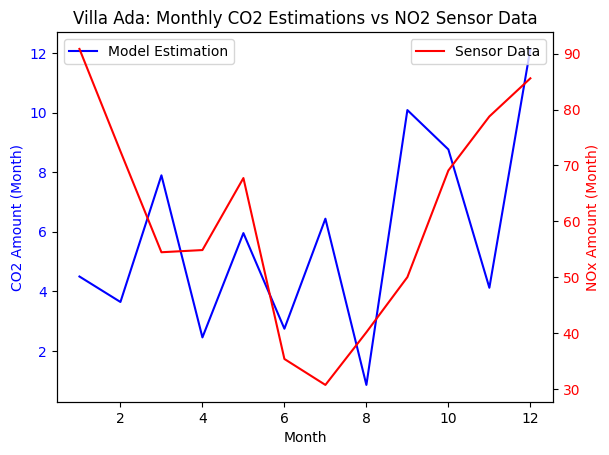


Correlation coefficient between Model and Sensor (monthly, Malagrotta): 0.43


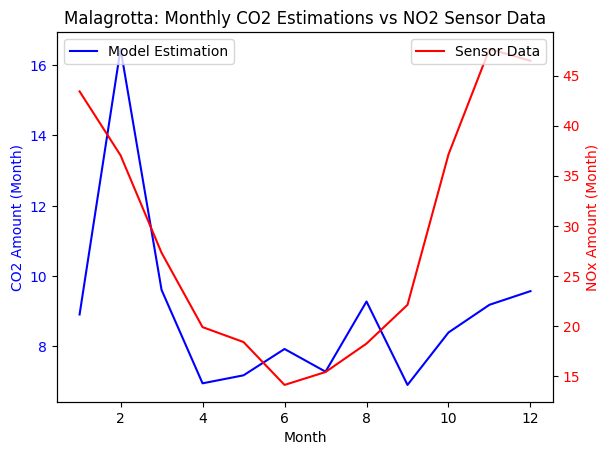


Correlation coefficient between Model and Sensor (monthly, Preneste): -0.14


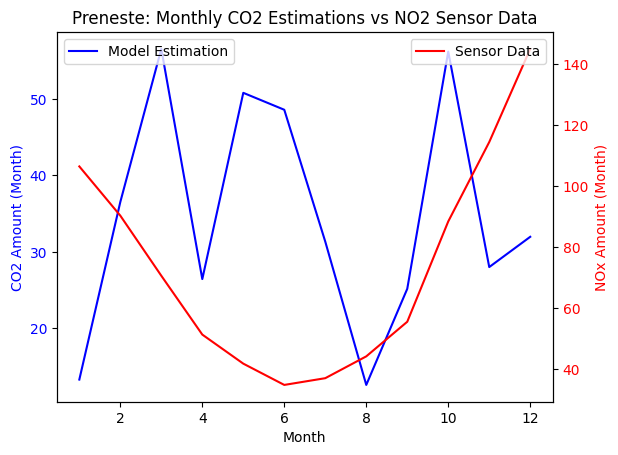


Correlation coefficient between Model and Sensor (monthly, Tiburtina): 0.60


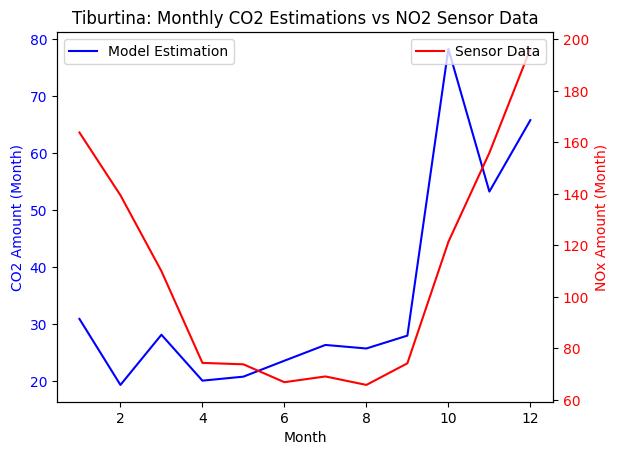


Mean Correlation across all areas: 0.039


In [ ]:
correlation_results_monthly = []

for area in stations_dictionary_rome:
  col_num = stations_dictionary_rome[area]['number']

  ts_co2_weekly_estimation = stations_dictionary_rome[area]['ts_weekly']

  # Group sensor emissions by week and take the mean
  ts_nox_monthly_sensor = sensors_rome.groupby(['month'])[col_num].mean().reset_index()

  correlation = plot_temporal_correlation(ts_co2_weekly_estimation, ts_nox_monthly_sensor, no2_col=col_num, time_period='month', area_name=area)

  # Append the correlation result to the list
  correlation_results_monthly.append(correlation)


# Calculate the mean correlation
mean_correlation_monthly = sum(correlation_results_monthly) / len(correlation_results_monthly)

# Display the mean correlation result
print(f'Mean Correlation across all areas: {mean_correlation_monthly:.3f}')

Quarter

In [ ]:
correlation_results_quarterly = []

for area in stations_dictionary_rome:
  col_num = stations_dictionary_rome[area]['number']

  ts_co2_weekly_estimation = stations_dictionary_rome[area]['ts_weekly']

  # Group sensor emissions by week and take the mean
  ts_nox_quarterly_sensor = sensors_rome.groupby(['quarter'])[col_num].mean().reset_index()

  correlation = plot_temporal_correlation(ts_co2_weekly_estimation, ts_nox_quarterly_sensor, no2_col=col_num, time_period='quarter', area_name=area)

  # Append the correlation result to the list
  correlation_results_quarterly.append(correlation)


# Calculate the mean correlation
mean_correlation_quarterly = sum(correlation_results_quarterly) / len(correlation_results_quarterly)

# Display the mean correlation result
print(f'Mean Correlation across all areas: {mean_correlation_quarterly:.3f}')

# Validation after Imputation

In [ ]:
%run /content/drive/MyDrive/Colab\ Notebooks/road_emission_imputation.py


Script is running correctly!


In [ ]:
# Example of using the predict_classified_road_emissions function
# You need to pass the appropriate dataframe, classifier, and regressor models
# df_road_emissions, classifier, regressor are placeholders for your actual objects.

result = predict_classified_road_emissions(df_road_emissions, classifier, regressor)


NameError: name 'df_road_emissions' is not defined

In [ ]:
city = 'Pisa'
input_path = '/content/drive/MyDrive/Colab Notebooks/phd_data/imputation/sarn/'
embs_n_co2m = pd.read_csv(input_path+'{}_simple_directed_network_embeddings.csv'.format(city.lower()))
# embs_n_co2m = embs_n_co2m[embs_n_co2m['CO_2/m']<=1]
# carbon_per_meter = embs_n_co2m[['road_link', 'start_point', 'end_point', 'CO_2/m']]
embeddings = embs_n_co2m
print(f"No. of road segments: {embeddings.shape[0]}")
embeddings = embeddings.drop(['length', 'key', 'oneway', 'lanes', 'maxspeed', 'geometry', 'simplified_segment_id'], axis=1)
embeddings.head()

No. of road segments: 12043


,start_point,end_point,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,...,vector_118,vector_119,vector_120,vector_121,vector_122,vector_123,vector_124,vector_125,vector_126,vector_127
0,8437288,346235886,-0.020982,0.060886,0.151047,0.025685,0.147802,-0.042211,0.010494,-0.006906,...,0.021932,-0.156169,0.120895,0.138591,0.017300,0.151953,0.009977,-0.160450,-0.091948,0.039844
1,8437288,367740049,-0.057252,0.037859,0.146737,0.003720,0.154477,-0.062712,0.026460,-0.013024,...,0.068240,-0.164502,0.103005,0.116652,0.018801,0.135922,0.026254,-0.153106,-0.104921,0.030517
2,31680764,302338593,0.042165,-0.025093,0.022216,0.085453,-0.101565,0.025829,-0.014251,-0.080383,...,0.096613,0.028628,0.019544,0.050344,0.041087,0.138578,0.021367,-0.029848,0.109002,0.032280
3,31680777,1117292464,-0.151568,-0.070124,-0.013206,0.051985,-0.059663,-0.045736,0.101697,-0.099223,...,0.122265,0.113445,-0.115014,0.065443,0.014771,0.051441,-0.018294,-0.042812,0.137723,0.002665
4,31680777,3488541943,-0.124054,-0.064807,-0.045462,0.075423,-0.061788,-0.030634,0.088993,-0.075408,...,0.106122,0.117674,-0.119080,0.068734,0.021115,0.071824,-0.030845,-0.032968,0.154654,-0.006603


In [ ]:
city = 'Pisa'
region_name ='%s, %s' %(city, city)
# data_path = '/content/drive/MyDrive/Colab Notebooks/phd_data/input_data/'
file_path = '/content/drive/MyDrive/Colab Notebooks/phd_data/input_data/pisa_features_and_emissions_simple_undirected_network'

G = ox.graph_from_place(region_name, simplify=True,  retain_all=False, network_type='drive_service')
G = ox.get_undirected(G)
road_segments = pd.read_csv(file_path)
# road_segments.rename(columns={'s_id': 'start_point', 'e_id': 'end_point'}, inplace=True) # rename some cols to merge with emissions df
road_segments['CO_2/m'] = road_segments['CO_2'] / road_segments['length']
road_segments = road_segments.drop({'CO_2', 'NO_x', 'PM', 'VOC', 'oneway', 'lanes', 'maxspeed'}, axis=1) # trivial cols

# Create new columns for start and end coordinates
road_segments['s_lat'] = road_segments['start_point'].apply(lambda node: G.nodes[node]['y'])
road_segments['s_lon'] = road_segments['start_point'].apply(lambda node: G.nodes[node]['x'])
road_segments['e_lat'] = road_segments['end_point'].apply(lambda node: G.nodes[node]['y'])
road_segments['e_lon'] = road_segments['end_point'].apply(lambda node: G.nodes[node]['x'])

road_segments = road_segments[road_segments['CO_2/m']<100]

print(f"No. of road segments: {road_segments.shape[0]}")
road_segments.head()

No. of road segments: 5696


,start_point,end_point,road_link,length,cultural,education,food,health,service,transportation,degree,b-centrality,c-centrality,h-centrality,CO_2/m,s_lat,s_lon,e_lat,e_lon
0,8437288,346235886,"(8437288, 346235886, 0)",768.388,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.011526,0.022925,237.277656,7.631827,43.617806,10.356745,43.610908,10.356633
1,8437288,367740049,"(8437288, 367740049, 0)",745.184,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000054,0.022918,235.485157,7.079422,43.617806,10.356745,43.611591,10.359665
2,8437288,3118669005,"(8437288, 3118669005, 0)",3981.872,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.012070,0.023447,245.183677,15.173157,43.617806,10.356745,43.651117,10.369821
3,31680764,206149014,"(31680764, 206149014, 0)",328.405,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.098791,0.029457,323.941584,30.115376,43.692185,10.435144,43.689862,10.437543
4,31680764,218749269,"(31680764, 218749269, 0)",259.022,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.015334,0.028980,317.873908,12.299865,43.692185,10.435144,43.689916,10.434645


In [ ]:
# Merge with start_point embeddings
merged_df = road_segments.merge(embeddings, on=['start_point', 'end_point'], how='inner')
# merged_df = merged_df.rename(columns={'embedding': 'start_embedding'})

print(len(merged_df))
# Now merged_df contains road_segments with start_embedding and end_embedding
merged_df.head()

4656


,start_point,end_point,road_link,length,cultural,education,food,health,service,transportation,...,vector_118,vector_119,vector_120,vector_121,vector_122,vector_123,vector_124,vector_125,vector_126,vector_127
0,8437288,346235886,"(8437288, 346235886, 0)",768.388,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021932,-0.156169,0.120895,0.138591,0.017300,0.151953,0.009977,-0.160450,-0.091948,0.039844
1,8437288,367740049,"(8437288, 367740049, 0)",745.184,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068240,-0.164502,0.103005,0.116652,0.018801,0.135922,0.026254,-0.153106,-0.104921,0.030517
2,31680764,302338593,"(31680764, 302338593, 0)",227.699,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096613,0.028628,0.019544,0.050344,0.041087,0.138578,0.021367,-0.029848,0.109002,0.032280
3,31680780,1675060934,"(31680780, 1675060934, 0)",644.319,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010384,0.027781,-0.075888,0.079615,0.021395,0.063868,0.052965,-0.050480,0.121712,-0.028187
4,31680780,3488541942,"(31680780, 3488541942, 0)",63.263,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111716,0.127332,-0.111027,0.082079,0.010693,0.106627,-0.048729,-0.028443,0.148764,0.007275


In [ ]:
# xgboost classifier, xgb regressor

classifier = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=10,
                          min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                          objective='binary:logistic')
regressor = xgb.XGBRegressor(learning_rate = 0.05, n_estimators = 500, max_depth = 6, eval_metric='mape')

prediction_errors = predict_classified_road_emissions(merged_df, classifier, regressor, ratio=0.9,
                                                      theta=4.2, shuffles=5, messages=False)

Creating aggregations of emission values of neighboring roads for each road segment.
Emissions of the test samples are not included.
Accuracy of the classification: 87.80%
Creating aggregations of emission values of neighboring roads for each road segment.
Emissions of the test samples are not included.
Accuracy of the classification: 91.67%
Creating aggregations of emission values of neighboring roads for each road segment.
Emissions of the test samples are not included.
Accuracy of the classification: 92.17%
Creating aggregations of emission values of neighboring roads for each road segment.
Emissions of the test samples are not included.
Accuracy of the classification: 92.44%
Creating aggregations of emission values of neighboring roads for each road segment.
Emissions of the test samples are not included.
Accuracy of the classification: 93.33%

For low-emission roads, mean MAPE is 238.77\% (72.726\%), mean MAE is 117.95%

For high-emission roads, mean MAPE is 144.62\% (99.582\%), m